**Matplotlib可视化的学习与实践**

简介：Python可视化库，Python数据分析库的“三驾马车”之一。

[官网](https://matplotlib.org/)：
> Matplotlib tries to make easy things easy and hard things possible.

本文纲要：
- Matplotlib绘图框架
- 基础图表绘制
- 图表元素调校
- 组合图
- 三维及科学可视化
- 动态可视化
- 底图水印
- 主题色配置
- 其他深入话题简介

## Matplotlib绘图框架

In [1]:
import pandas as pd
import matplotlib.pyplot as plt #导入对应的库

In [2]:
df=pd.DataFrame({'x':['Mon.','Tue.','Wed.','Thu.','Fri.'],
                 'y':[76,37,90,60,50],
                 'z':[37,46,53,81,60]})  #示例数据集

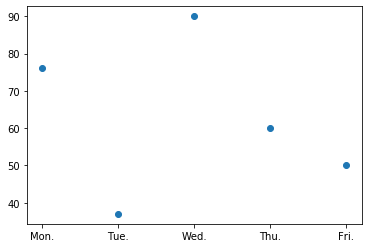

In [3]:
#在jupyter notebook环境下
%matplotlib inline 
#将图直接在jupyter notebook环境下输出，不需再写 plt.show()
fig, ax = plt.subplots() #fig = plt.figure() ax= fig.add_subplot(111)
ax.plot(df['x'],df['y'],'o') #散点图

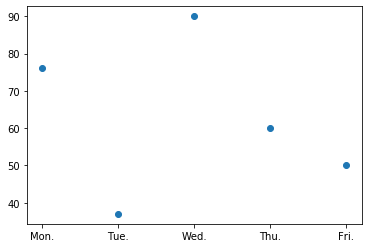

In [4]:
#在shell 脚本环境下：
fig, ax = plt.subplots() 
ax.plot(df['x'],df['y'],'o') 
plt.show()

两套可视化接口，plt.plot()系列和 fig, ax = plt.subplots();ax.plot() 系列，分别对应MATLAB的陈述式语法和面向对象写法；
具体可参考[lifecycle.html](https://matplotlib.org/tutorials/introductory/lifecycle.html#sphx-glr-tutorials-introductory-lifecycle-py)
plt.plot()适合于快速出图，ax.plot()更方便用于精细绘图；

plt.plot(df['x'],df['y'],'o') 

等价于

fig, ax = plt.subplots() 
ax.plot(df['x'],df['y'],'o') 


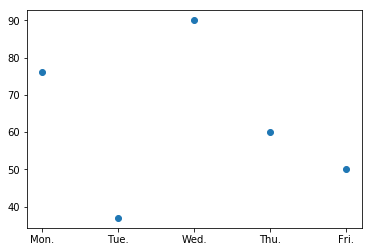

In [7]:
plt.plot(df['x'],df['y'],'o')   #ax.plot(df['x'],df['y'],'o') 的效果上面已展示

## 基础图表绘制
画散点图、折线图、柱状图、条形图、饼图、直方图、箱线图

### 散点图

**散点图**两种主要方法：
- scatter(x,y)
- plot(x,y,'o')

In [5]:
import matplotlib as mpl
#配置一套主题色
mpl.rcParams["axes.prop_cycle"]=mpl.cycler('color', ['1EAFAE', 'A3FFFF', '69FFFF', 'BA5C25', 'FFA069', '9E5B3A', 'D7CE88'])

(0, 100)

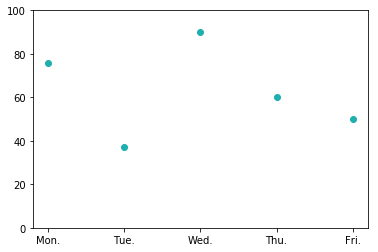

In [12]:
fig, ax = plt.subplots() 
ax.scatter(df['x'],df['y'])
ax.set_ylim(0,100) #设置y轴范围为[0,100]，同理设置x周用 .set_xlim(0,100)
#另外的写法  axes.set(ylim=[0,100])  plt.ylim(0,100)

scatter(x,y) 的参数

#### 气泡图

把颜色和半径属性也用上，因为color不能赋值分类变量，因此如果要用颜色区分类型需先做筛选（或者用形状做类型区分<也还是需要做筛选>）

(0, 100)

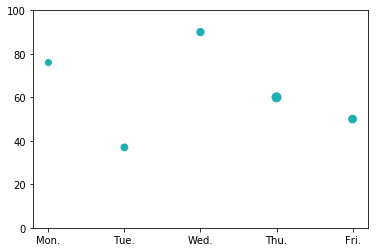

In [9]:
# 散点大小参数，画气泡图 ax.plot(df['x'],df['y'],markersize=df['z']) 不可以,markersize接受的是float不是series
fig, ax = plt.subplots() 
ax.scatter(df['x'],df['y'], s=df['z'])
ax.set_ylim(0,100)

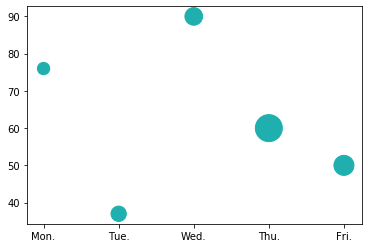

In [11]:
fig, ax = plt.subplots()  #更明显的气泡
ax.scatter(df['x'],df['y'],s=(df['z']**2)/9)

Text(0,0.5,'y')

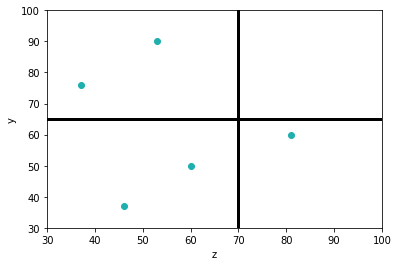

In [47]:
#矩阵图
import matplotlib.lines as lines
fig, ax= plt.subplots()
ax.plot(df['z'],df['y'],'o')
ax.add_artist(lines.Line2D([70,70], [30,100],color='#000000',lw=3)) #是[x1,x2],[y1,y2] 不是[x1,y1],[x2,y2]
ax.add_artist(lines.Line2D([30,100], [65,65],color='#000000',lw=3))
ax.set_xlim(30,100)
ax.set_ylim(30,100)
ax.set_xlabel("z")
ax.set_ylabel("y")

(0, 100)

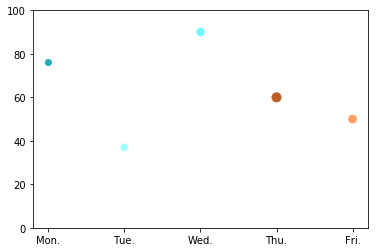

In [34]:
#给每个点都赋颜色
fig, ax = plt.subplots() 
ax.scatter(df['x'],df['y'], s=df['z'],c=['#1EAFAE', '#A3FFFF', '#69FFFF', '#BA5C25', '#FFA069'])
ax.set_ylim(0,100)

### 折线图

(0, 100)

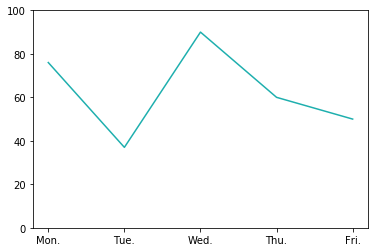

In [14]:
# 折线图
fig, ax = plt.subplots() 
ax.plot(df['x'],df['y'])
ax.set_ylim(0,100)

plot(x,y,'o') 的参数

(0, 100)

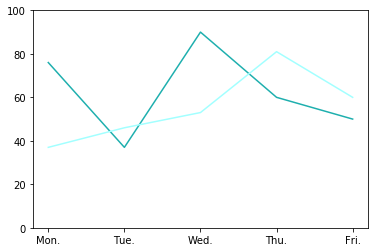

In [15]:
# 画多条线进行对比
fig, ax = plt.subplots() 
ax.plot(df['x'],df['y'])
ax.plot(df['x'],df['z'])
ax.set_ylim(0,100)
#三种画多条折线的写法

(0, 100)

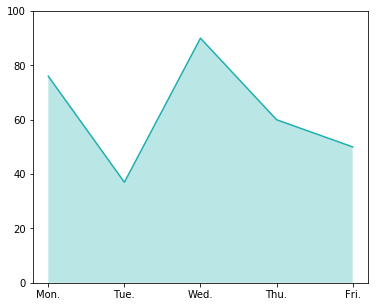

In [7]:
#面积图 核心是用fill填充出一个多边形，最后一个点不需要等于第一个点
x = list(range(1,len(df)+1)) 
xw=x.copy()
y=list(df['y'])
x0=x[0]
x1=x[-1]
x.insert(0,x0)
y.insert(0,0)
x.append(x1)
y.append(0)
fig, ax = plt.subplots(figsize=(6,5))

ax.plot(xw,df['y']) #折线
ax.fill(x,y,alpha=0.3)
ax.set_xticks(x[1:-1])
ax.set_xticklabels(df['x'])
ax.set_ylim(0,100)

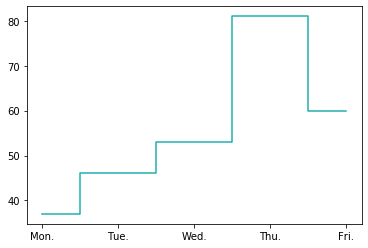

In [13]:
#阶梯线图
fig,ax=plt.subplots()
ax.step(df['x'], df['z'], where='mid', label='mid')

### 柱状图
- 基础柱状图
- 等值堆叠柱状图
- 比例堆叠柱状图

(0, 100)

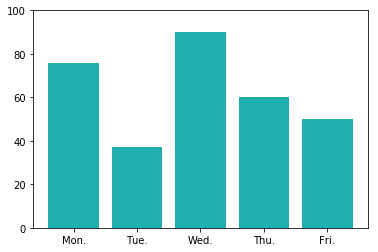

In [22]:
#柱状图
fig, ax = plt.subplots() 
ax.bar(df['x'],df['y'])
ax.set_ylim(0,100)

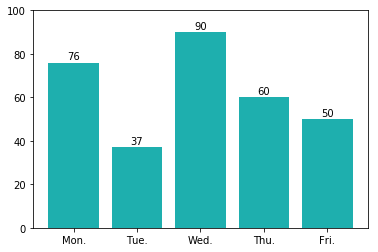

In [8]:
#给柱状图标上标签
fig,ax= plt.subplots()
rects=ax.bar(df['x'],df['y'])
ax.set_ylim(0,100)
for rect in rects:
    height = rect.get_height()
    ax.annotate('{}'.format(height),
            xy=(rect.get_x() + rect.get_width() / 2, height),
            xytext=(0,1),  #往上多一个像素偏移
            textcoords="offset points",
            ha='center', va='bottom')

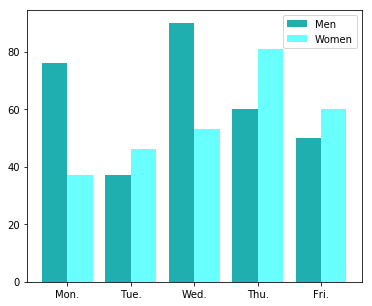

In [26]:
#簇状柱 ClusterBar
x = list(range(1,len(df)+1)) 

width = 0.2  #每个柱的宽度
x1=[i-width for i in x]
x2=[i+width for i in x]
fig, ax = plt.subplots(figsize=(6,5))
rects1 = ax.bar(x1,df['y'], width*2, label='Men',color='#1EAFAE')
rects2 = ax.bar(x2,df['z'], width*2, label='Women',color='#69FFFF')

ax.set_xticks(x)
ax.set_xticklabels(df['x'])
ax.legend()

[Text(0,0,'Mon.'),
 Text(0,0,'Tue.'),
 Text(0,0,'Wed.'),
 Text(0,0,'Thu.'),
 Text(0,0,'Fri.')]

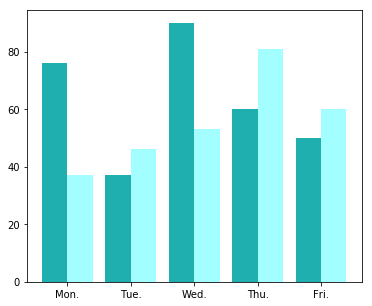

In [38]:
#簇状柱 ClusterBar
x = list(range(1,len(df)+1)) 

width = 0.2  #每个柱的宽度
x1=[i-width for i in x]
x2=[i+width for i in x]
fig, ax = plt.subplots(figsize=(6,5))
ax.bar(x1,df['y'], width*2)
ax.bar(x2,df['z'], width*2)

ax.set_xticks(x)
ax.set_xticklabels(df['x'])

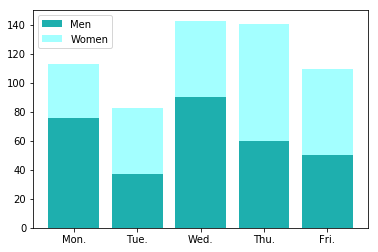

In [35]:
#堆叠柱
fig,ax= plt.subplots()
ax.bar(df['x'],df['y'],label='Men')
ax.bar(df['x'],df['z'],bottom=df['y'],label='Women')
ax.legend()

Text(0.8,0.9,'%')

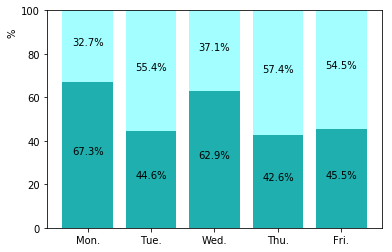

In [28]:
#等比例堆叠柱
fig,ax= plt.subplots()
df['y1']=df.apply(lambda x:(x['y'])*100/(x['y']+x['z']),axis=1)
df['z1']=df.apply(lambda x:(x['z'])*100/(x['y']+x['z']),axis=1)
rs1=ax.bar(df['x'],df['y1'])
rs2=ax.bar(df['x'],df['z1'],bottom=df['y1'])
for i in range(len(rs1)):
    h1=rs1[i].get_height()
    ax.annotate('{0:.1f}%'.format(h1),
            xy=(rs1[i].get_x() + rs1[i].get_width() / 2,h1//2),
            ha='center', va='bottom')
    ax.annotate('{0:.1f}%'.format(rs2[i].get_height()),
            xy=(rs1[i].get_x() + rs1[i].get_width() / 2,h1+(rs2[i].get_height())//2),
            ha='center', va='bottom')

ax.set_ylim(0,100)
ax.set_ylabel("%",x=0.8,y=0.9)

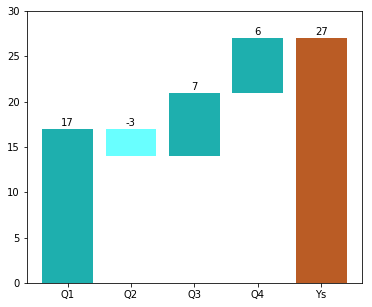

In [50]:
#瀑布图

x=[17,-3,7,6] #原始数据

def waterfall_chart(x):
    j=0 #sum(x) 最终柱的结果
    k=0 #k=x[i-1]
    x0=[]
    for i in x:
        if i<0:
            x0.append(j+i)
        else:
            x0.append(j)
        j+=i

    x1=[abs(i) for i in x]

    c1=['#1EAFAE' if i>0 else '#69FFFF' for i in x]
    c1.append('#BA5C25')
    x0[0]=0
    x0.append(0)
    x1.append(j)
    x.append(j)
    w=list(range(1,len(x)+1))
    fig,ax= plt.subplots(figsize=(6,5))
    ax.bar(w,x0,alpha=0) #都透明度为0了，颜色不重要
    rects=ax.bar(w,x1,bottom=x0,color=c1) #颜色可传一个数组的
    ax.set_ylim(0, 30)
    i=0
    for rect in rects: #加上适当的文本标签 
        height = rect.get_height()+x0[i]
        ax.annotate('{}'.format(x[i]),
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0,1),  # 1 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')
        i+=1
    ax.set_xticklabels(['','Q1','Q2','Q3','Q4','Ys'])
    return ax
waterfall_chart(x)

In [16]:
'{0:.2f}'.format(3.1415)

'3.14'

([<matplotlib.axis.YTick at 0x29c88dcc6a0>,
 <a list of 3 Text yticklabel objects>)

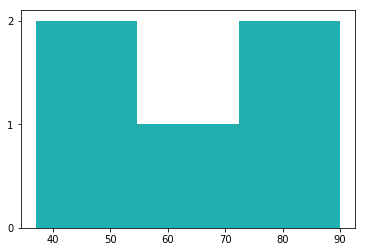

In [32]:
#直方图
fig, ax = plt.subplots() 
ax.hist(df['y'],bins=3)
plt.yticks([0,1,2])

(array([2., 1., 1., 1.]),
 array([37.  , 50.25, 63.5 , 76.75, 90.  ]),
 <a list of 4 Patch objects>)

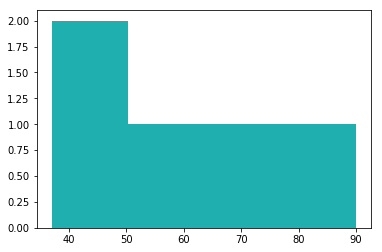

In [45]:
fig, ax = plt.subplots() 
ax.hist(df['y'],bins=4)

{'whiskers': [<matplotlib.lines.Line2D at 0x21a58219cf8>,
 'caps': [<matplotlib.lines.Line2D at 0x21a58221588>,
 'boxes': [<matplotlib.lines.Line2D at 0x21a58219780>],
 'medians': [<matplotlib.lines.Line2D at 0x21a58221dd8>],
 'fliers': [<matplotlib.lines.Line2D at 0x21a58221eb8>],
 'means': []}

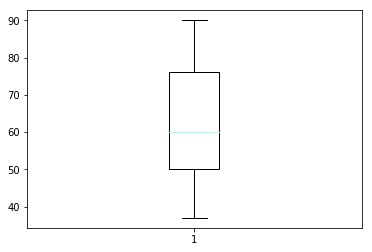

In [32]:
#箱线图
fig, ax = plt.subplots() 
ax.boxplot(df['y'])

<BarContainer object of 5 artists>

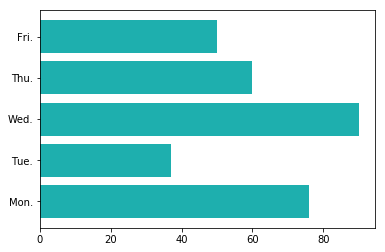

In [24]:
#条形图
fig, ax = plt.subplots() 
ax.barh(df['x'],df['y'])

([<matplotlib.patches.Wedge at 0x29c88e794a8>,
 [Text(0.795183,0.760055,'76'),
  Text(-0.352494,1.04199,'37'),
  Text(-1.0995,-0.0331172,'90'),
  Text(-0.0386347,-1.09932,'60'),
  Text(0.964363,-0.529155,'50')])

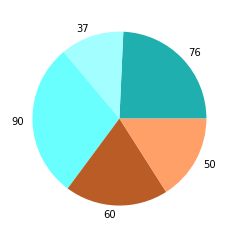

In [34]:
#饼图
fig, ax = plt.subplots(subplot_kw=dict(aspect="equal")) 
ax.pie(df['y'],labels=df['y']) #为了得到不扁的饼，设置xy轴比例尺相同

([<matplotlib.patches.Wedge at 0x29c88e324e0>,
 [Text(0.795183,0.760055,''),
  Text(-0.352494,1.04199,''),
  Text(-1.0995,-0.0331172,''),
  Text(-0.0386347,-1.09932,''),
  Text(0.964363,-0.529155,'')])

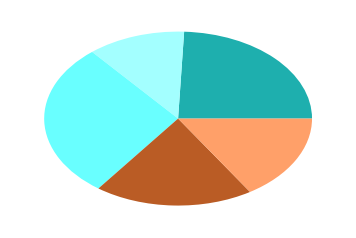

In [33]:
fig, axes = plt.subplots() 
axes.pie(df['y'])

([<matplotlib.patches.Wedge at 0x29c8909f7f0>,
 [Text(0.313719,0.703193,''),
  Text(0.753113,0.160377,''),
  Text(0.470765,-0.609328,''),
  Text(-0.584519,-0.501236,''),
  Text(-0.484464,0.598494,'')])

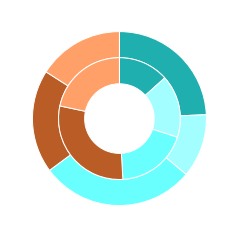

In [42]:
#环状图 及旭日图
fig, ax = plt.subplots(subplot_kw=dict(aspect="equal")) 
ax.pie(df['y'], radius=1, colors=['#1EAFAE', '#A3FFFF', '#69FFFF', '#BA5C25', '#FFA069'],startangle=90,counterclock=False,
       wedgeprops=dict(width=0.3, edgecolor='w'))

ax.pie(df['z'], radius=1-0.3, colors=['#1EAFAE', '#A3FFFF', '#69FFFF', '#BA5C25', '#FFA069'],startangle=90,counterclock=False,
       wedgeprops=dict(width=0.3, edgecolor='w'))

## 图表元素调校

[官网文档](https://matplotlib.org/tutorials/introductory/usage.html)

封装为一个函数来用，画瀑布图，设置柱图的文本

(0, 100)

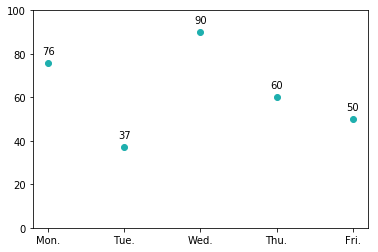

In [51]:
fig, ax = plt.subplots() #给散点图加上文本标签
w=ax.plot(df['x'],df['y'],'o') #散点图
for i,c in df.iterrows():
    ax.text(i,c['y']+4,c['y'],ha='center')
    #ax.text(i-0.08,c['y']+4,c['y'])
ax.set_ylim(0,100)

In [ ]:
#因为可以传颜色数组，只用一个辅助列的写法
x=[17,-3,7,6] #原始数据

j=0 #sum(x[0:i-1])
k=0 #k=x[i-1]
x0=[]
for i in x:
    if i<0:
        x0.append(j+i)
    else:
        x0.append(j)
    
    j+=i

x1=[abs(i) for i in x]

c1=['#1EAFAE' if i>0 else '#69FFFF' for i in x]
c1.append('#BA5C25')
x0[0]=0
x0.append(0)
x1.append(j)
x.append(j)
w=list(range(1,len(x)+1))

fig,ax= plt.subplots(figsize=(6,5))
ax.bar(w,x0,alpha=0) #都透明度为0了，颜色不重要
rects=ax.bar(w,x1,bottom=x0,color=c1) #颜色是可以传一个数组的
ax.set_ylim(0, 30)
#后续：加上适当的文本标签 
i=0
for rect in rects:
    height = rect.get_height()+x0[i]
    ax.annotate('{}'.format(x[i]),
            xy=(rect.get_x() + rect.get_width() / 2, height),
            xytext=(0,1),  # 1 points vertical offset
            textcoords="offset points",
            ha='center', va='bottom')
    i+=1


## 组合图绘制

组合图:多种图表类型在同一张图里，突出某些信息；多是双坐标轴；

单坐标轴：散点+折线； 柱状图+折线图，棒棒糖图 ，棒棒糖图，改图层顺序，zorder参数

帕累托图：双坐标轴的可视化典例

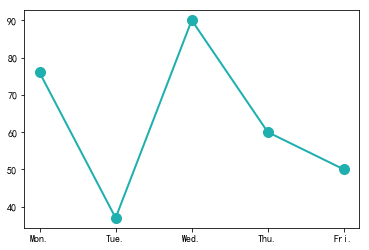

In [57]:
fig, ax= plt.subplots()
ax.plot(df['x'],df['y'],'o-',markersize=10,lw=2)

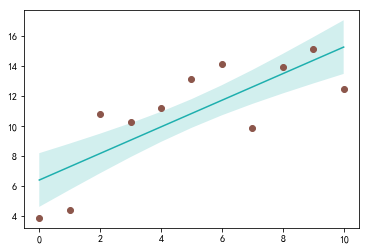

In [48]:
# 散点+折线 抄自https://matplotlib.org/gallery/lines_bars_and_markers/fill_between_demo.html#sphx-glr-gallery-lines-bars-and-markers-fill-between-demo-py
N = 21
x = np.linspace(0, 10, 11)
y = [3.9, 4.4, 10.8, 10.3, 11.2, 13.1, 14.1,  9.9, 13.9, 15.1, 12.5]

# fit a linear curve an estimate its y-values and their error.
a, b = np.polyfit(x, y, deg=1)
y_est = a * x + b
y_err = x.std() * np.sqrt(1/len(x) +
                          (x - x.mean())**2 / np.sum((x - x.mean())**2))

fig, ax = plt.subplots()
ax.plot(x, y_est, '-')
ax.fill_between(x, y_est - y_err, y_est + y_err, alpha=0.2)
ax.plot(x, y, 'o', color='tab:brown')

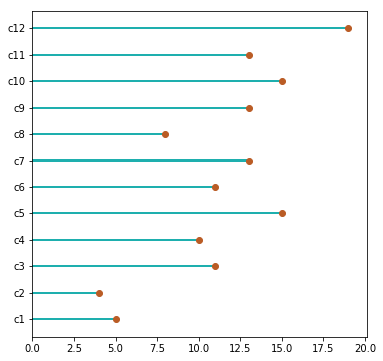

In [60]:
#棒棒糖图
y = [5, 4, 11, 10, 15, 11, 13, 8,13,15,13,19]
fig, ax= plt.subplots(figsize=(6,6)) 

x=['c'+str(i) for i in range(1,len(y)+1)]

ax.barh(x,y,height=0.08,zorder=1) #图层顺序的解决方案
ax.scatter(y,x,zorder=2,color='#ba5c25') #改了zorder之后渲染颜色的选择也改了，就需要再手动设置

(0, 20)

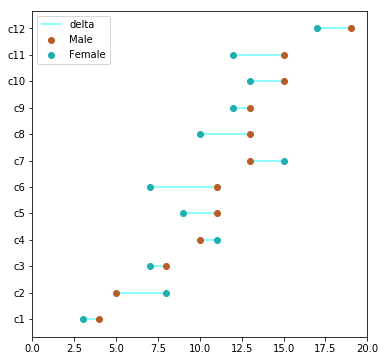

In [61]:
#哑铃图
y = [5, 4, 11, 10, 15, 11, 13, 8,13,15,13,19]
z=[1,-3,1,-1,2,4,-2,3,1,2,3,2]
fig, ax= plt.subplots(figsize=(6,6)) 
y=sorted(y) #先排个序

y1=[y[i]-z[i] for i in range(len(y))]
x=['c'+str(i) for i in range(1,len(y)+1)]
x1=[0 for i in range(len(y))]
z1=[min(y[i],y1[i]) for i in range(len(y))]
z2=[max(y[i],y1[i]) for i in range(len(y))]
ax.hlines(x,z1,z2,color='#69ffff')
ax.scatter(y,x,zorder=2,color='#ba5c25') 
ax.scatter(y1,x,zorder=2,color='#1eafae') 
ax.legend(('delta','Male', 'Female'), loc='upper left')
ax.set_xlim(0,20)

Text(0.5,1,'Pareto in Matplotlib')

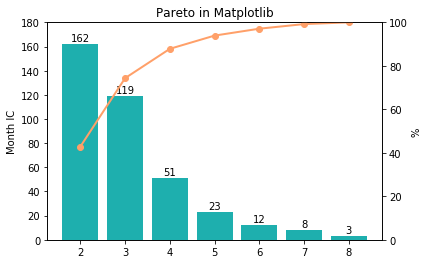

In [59]:
#帕累托图
y=[23,162,51,119,12,3,8] #模拟数据
x=[str(i) for i in range(2,len(y)+2)]
y=sorted(y,reverse=True)
ysum=sum(y)
y2=[]
cc=0
for i in y:
    cc+=i
    y2.append(cc/ysum*100)
fig = plt.figure()
ax1 = fig.add_subplot(111)
rects=ax1.bar(x,y,color='#1EAFAE')
ax1.set_ylabel('Month IC')
ax1.set_ylim(0, 180)
ax2 = ax1.twinx() #https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.twinx.html#matplotlib.axes.Axes.twinx
ax2.set_ylim(0, 100)

ax2.plot(x, y2,'o',color='#FFA069',linewidth=2,ls='-')

ax2.set_ylabel('%')

for rect in rects:
    height = rect.get_height()
    ax1.annotate('{}'.format(height),
            xy=(rect.get_x() + rect.get_width() / 2, height),
            xytext=(0,1),  # 1 points vertical offset
            textcoords="offset points",
            ha='center', va='bottom')
ax1.set_title("Pareto in Matplotlib") #

开双轴关键点：ax2 = ax1.twinx()

https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.twinx.html#matplotlib.axes.Axes.twinx


分面、子图




matplotlib.axes._subplots.AxesSubplot

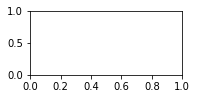

In [48]:
ax=plt.subplot(3,2,4)
type(ax)

numpy.ndarray

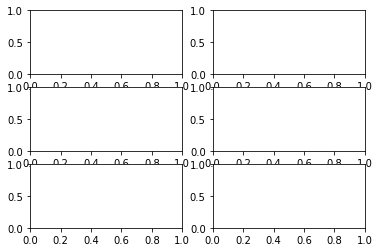

In [49]:
fig,ax=plt.subplots(3,2)
type(ax)

[]

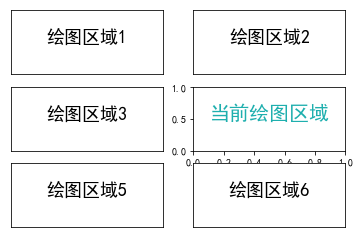

In [60]:
ax1=plt.subplot(3,2,1)
ax1.text(0.5,0.5,'绘图区域1',ha='center',fontsize=18)
ax2=plt.subplot(3,2,2)
ax2.text(0.5,0.5,'绘图区域2',ha='center',fontsize=18)
ax3=plt.subplot(3,2,3)
ax3.text(0.5,0.5,'绘图区域3',ha='center',fontsize=18)
ax4=plt.subplot(3,2,4)
ax4.text(0.5,0.5,'当前绘图区域',ha='center',color='#1EAFAE',fontsize=20)
ax5=plt.subplot(3,2,5)
ax5.text(0.5,0.5,'绘图区域5',ha='center',fontsize=18)
ax6=plt.subplot(3,2,6)
ax6.text(0.5,0.5,'绘图区域6',ha='center',fontsize=18)

ax1.set_xticks([])
ax2.set_xticks([])
ax3.set_xticks([])
ax5.set_xticks([])
ax6.set_xticks([])
ax1.set_yticks([])
ax2.set_yticks([])
ax3.set_yticks([])
ax5.set_yticks([])
ax6.set_yticks([])

[]

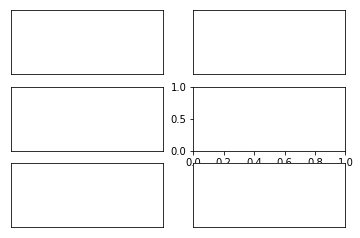

In [5]:
ax1=plt.subplot(3,2,1)

ax2=plt.subplot(3,2,2)

ax3=plt.subplot(3,2,3)

ax4=plt.subplot(3,2,4)

ax5=plt.subplot(3,2,5)

ax6=plt.subplot(3,2,6)


ax1.set_xticks([])
ax2.set_xticks([])
ax3.set_xticks([])
ax5.set_xticks([])
ax6.set_xticks([])
ax1.set_yticks([])
ax2.set_yticks([])
ax3.set_yticks([])
ax5.set_yticks([])
ax6.set_yticks([])

## 三维及科学可视化

matplotlib非常擅长的领域

In [62]:
from mpl_toolkits.mplot3d import Axes3D 

In [ ]:
fig = plt.figure()
ax = fig.gca(projection='3d')

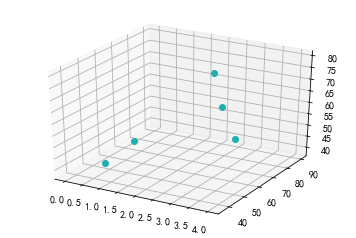

In [64]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(range(len(df)),df['y'],df['z'],'o')

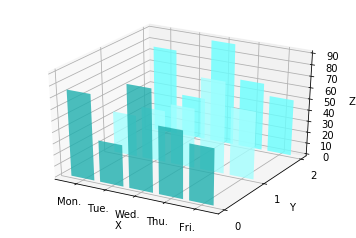

In [56]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.bar(df['x'],df['y'], zs=0, zdir='y', alpha=0.8)
ax.bar(df['x'],df['z'], zs=1, zdir='y', alpha=0.8)
ax.bar(df['x'],df['y'], zs=2, zdir='y', alpha=0.8)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.set_yticks([0,1,2])

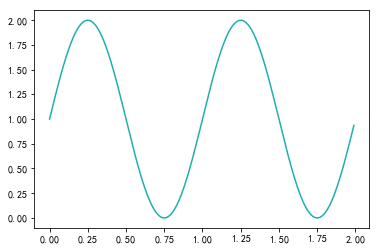

In [65]:
#三角函数图像
t = np.arange(0.0, 2.0, 0.01)
s = 1 + np.sin(2 * np.pi * t)
fig, ax = plt.subplots()
ax.plot(t, s)

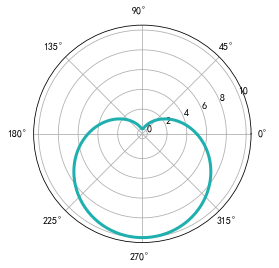

In [58]:
t = np.arange(0.0, 2.0, 0.01)
s = 1 + np.sin(2 * np.pi * t)

fig, ax = plt.subplots()
ax.plot(t, s)
#极坐标下的心形线（一定要加上方程的文本标签）
theta= np.arange(0, 2*np.pi, 0.05)
r=5*(1-np.sin(theta))
ax = plt.subplot(111, projection='polar')
ax.plot(theta, r,lw=3)
ax.grid(True)

## 动态可视化

## 底图水印


## 主题色配置

`mpl.style.use('lyncolss') `

支持中文

`mpl.rcParams['font.family']='SimHei'`

图片的导出与保存

`plt.savefig(fpath,dpi=300)`

In [52]:
mpl.rcParams['font.family']='SimHei'

## 其他深入话题简介
- **极坐标**:
- **地图+basemap**:

## 参考资料

- 官网是最好的参照：https://matplotlib.org/
- matplotlib：先搞明白plt. /ax./ fig再画 - 姚太多啊的文章 - 知乎
  https://zhuanlan.zhihu.com/p/93423829
- 看所有线类型支持的属性：https://matplotlib.org/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D 
- 嵩天老师MOOC课程https://www.icourse163.org/course/0809BIT021B-1001870002
- https://matplotlib.org/tutorials/introductory/usage.html